In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def split_data_by_bands(filename):
    bands = []
    current_band_data = []

    with open(filename, 'r') as file:
        next(file)

        for line in file:
            if line.strip():  # Check if the line is not empty
                data = line.split()
                current_band_data.append([float(val) for val in data])
            else:
                bands.append(current_band_data)
                current_band_data = []

        if current_band_data:
            bands.append(current_band_data)

    return bands

def filter_by_k_value(df, column_name, value):
    """
    Filter the DataFrame `df` for rows where `column_name` matches `value`.

    Parameters:
        df (pd.DataFrame): The DataFrame to filter (e.g., cb1 or cb2).
        column_name (str): The name of the column to filter by ('kx' or 'ky').
        value (float): The value to filter for in the specified column.

    Returns:
        pd.DataFrame: A DataFrame containing only the rows where the column value matches the input.
    """
    if column_name not in ['kx', 'ky']:
        raise ValueError("Column name must be 'kx' or 'ky'")

    filtered_df = df[df[column_name] == value]
    return filtered_df


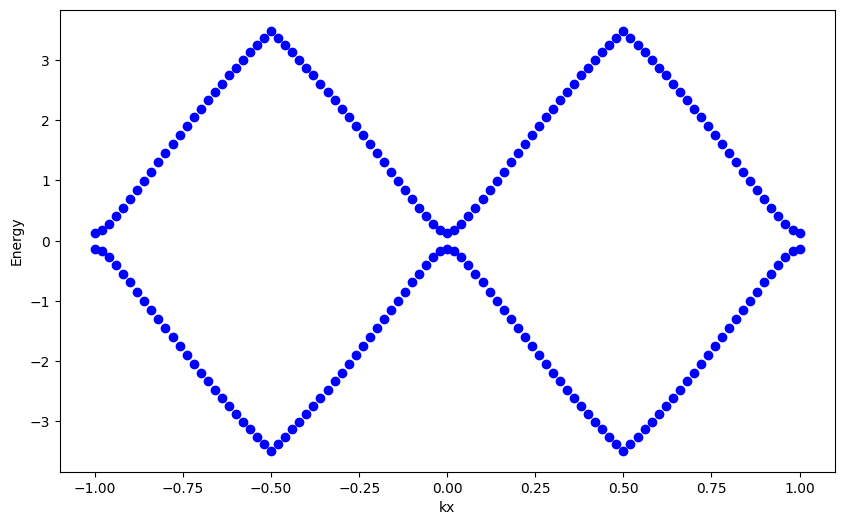

In [31]:
filename = "Bernal_rectangular_cell/dense/3dbands/bulkek.dat"
bands = split_data_by_bands(filename)
cb1 = bands[3]
cb2 = bands[4]
columns = ['kx', 'ky', 'kz', 'klen', 'energy']
cb1_df = pd.DataFrame(cb1, columns=columns)
cb2_df = pd.DataFrame(cb2, columns=columns)

ky_value = 0.35
cb1_filtered = filter_by_k_value(cb1_df, 'ky', ky_value)
cb2_filtered = filter_by_k_value(cb2_df, 'ky', ky_value)
plt.figure(figsize=(10, 6))
plt.scatter(cb1_filtered['kx'], cb1_filtered['energy'], color='blue')
plt.scatter(cb2_filtered['kx'], cb2_filtered['energy'], color='blue')
plt.xlabel('kx')
plt.ylabel('Energy')
plt.show()

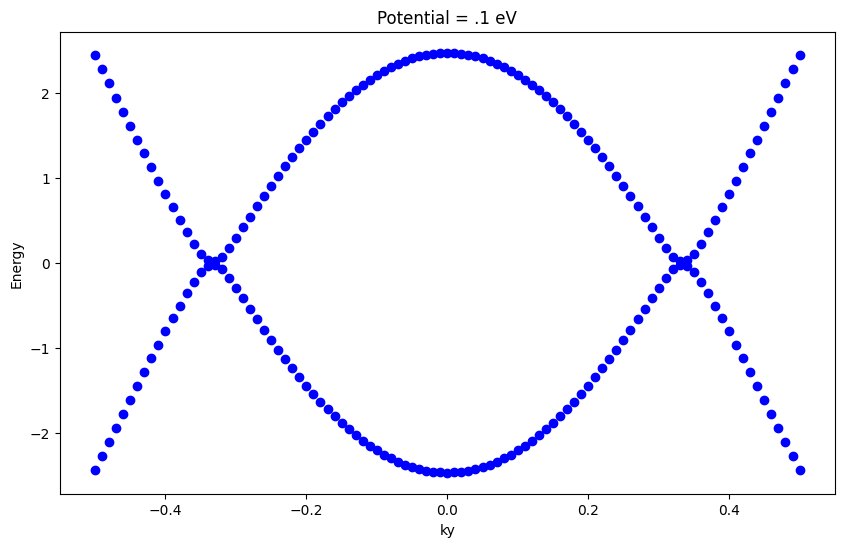

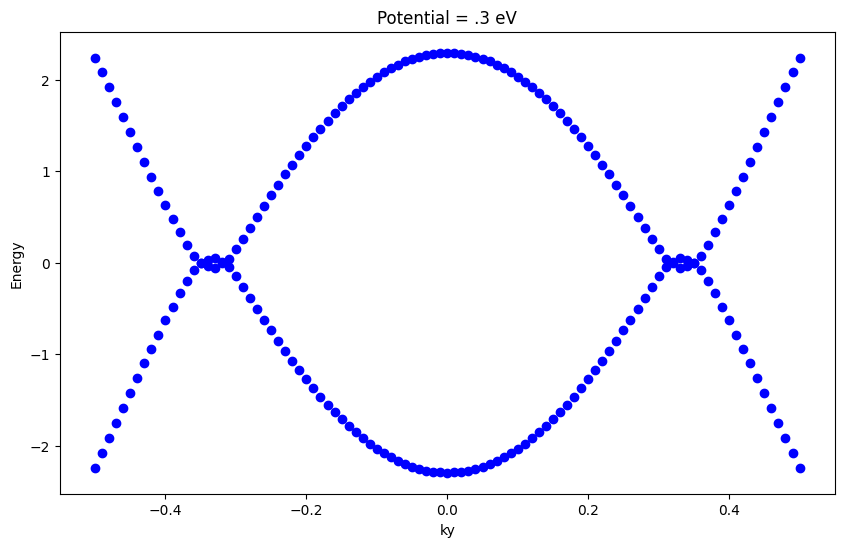

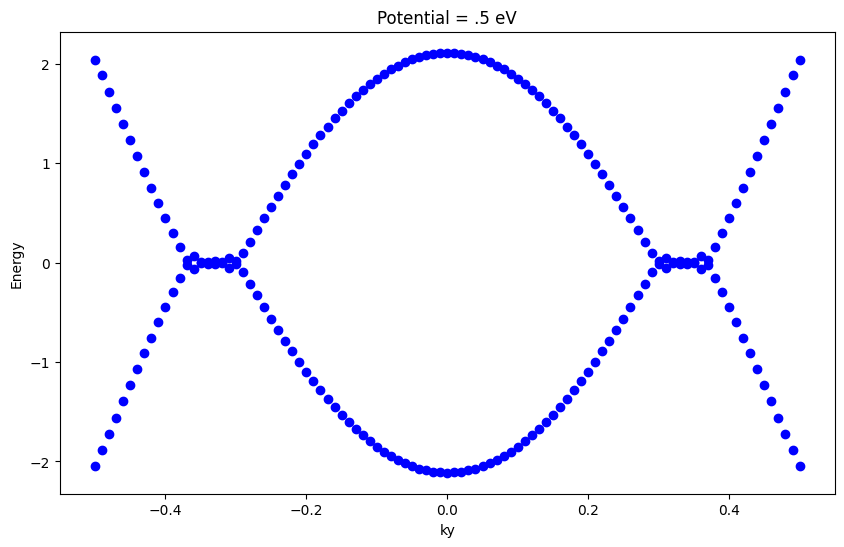

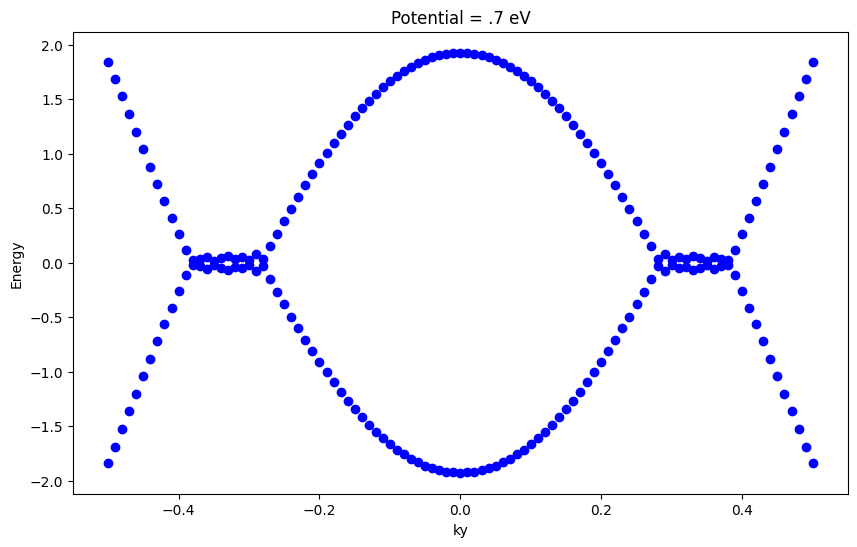

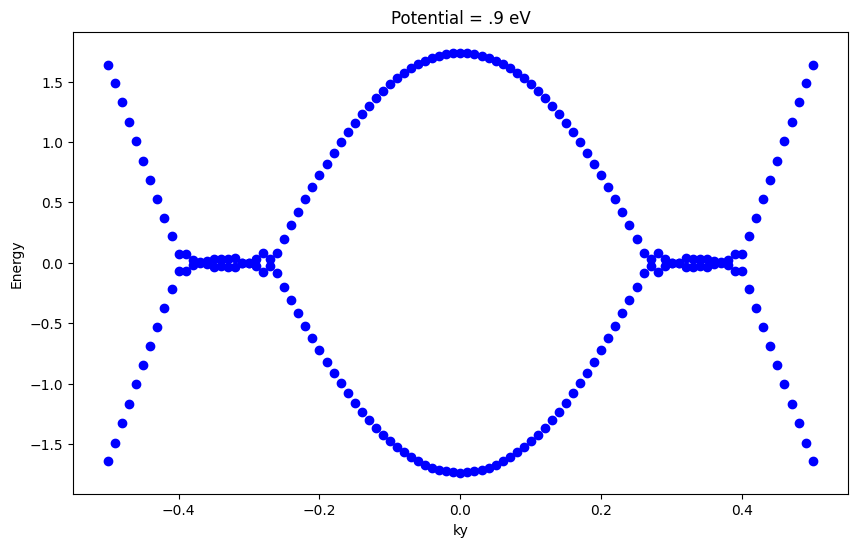

In [22]:
potentials = ['.1','.3','.5','.7','.9']
for potential in potentials:
    filename = f"length_15nm/dense/sine_potential_{potential}/bulkek.dat"
    bands = split_data_by_bands(filename)
    cb1 = bands[139]
    cb2 = bands[140]
    columns = ['kx', 'ky', 'kz', 'klen', 'energy']
    cb1_df = pd.DataFrame(cb1, columns=columns)
    cb2_df = pd.DataFrame(cb2, columns=columns)

    kx_value = 0.0
    cb1_filtered = filter_by_k_value(cb1_df, 'kx', kx_value)
    cb2_filtered = filter_by_k_value(cb2_df, 'kx', kx_value)
    plt.figure(figsize=(10, 6))
    plt.scatter(cb1_filtered['ky'], cb1_filtered['energy'], color='blue')
    plt.scatter(cb2_filtered['ky'], cb2_filtered['energy'], color='blue')
    plt.xlabel('ky')
    plt.ylabel('Energy')
    plt.title(f"Potential = {potential} eV")
    plt.show()

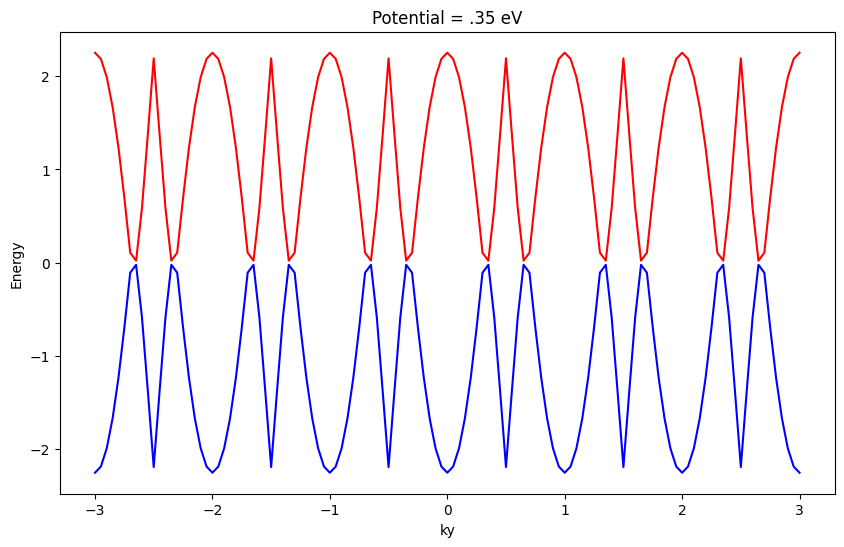

In [34]:
potentials = ['.35']
for potential in potentials:
    filename = f"length_15nm/dense/sine_potential_{potential}/bulkek.dat"
    bands = split_data_by_bands(filename)
    cb1 = bands[139]
    cb2 = bands[140]
    columns = ['kx', 'ky', 'kz', 'klen', 'energy']
    cb1_df = pd.DataFrame(cb1, columns=columns)
    cb2_df = pd.DataFrame(cb2, columns=columns)

    kx_value = 0.0
    cb1_filtered = filter_by_k_value(cb1_df, 'kx', kx_value)
    cb2_filtered = filter_by_k_value(cb2_df, 'kx', kx_value)
    plt.figure(figsize=(10, 6))
    plt.plot(cb1_filtered['ky'], cb1_filtered['energy'], color='blue')
    plt.plot(cb2_filtered['ky'], cb2_filtered['energy'], color='red')
    plt.xlabel('ky')
    plt.ylabel('Energy')
    plt.title(f"Potential = {potential} eV")
    plt.show()